Author: Nicholas Orgel

Creation Date: 02.01.2023

# Task
Clean the files & combine them into one final DataFrame.

- This dataframe should have the following columns:
    - Hero (Just the name of the Hero)
    - Publisher
    - Gender
    - Eye Color
    - Race
    - Hair Color
    - Height (numeric)
    - Skin Color
    - Alignment
    - Weight (numeric)
    
    - **Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:**
        - Agility
        - Flight
        - Superspeed
        - etc.
        
---

**Hint: There is a space in "100 kg" or "52.5 cm"**

# Steps

## Import Libraries

In [1]:
import pymysql
pymysql.install_as_MySQLdb()
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

## Load DataFrames

In [2]:
hero_info = pd.read_csv('Data/superhero_info.csv')
hero_powers = pd.read_csv('Data/superhero_powers.csv')

## hero_info

---
In the **hero_info** dataset the column **Hero|Publisher** needs to separated. And the **Measurements** column needs to be separated into ***'Height'* & *'Weight'***

In [3]:
# Load hero_info dataset
hero_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


## Data cleaning hero_info

### Check for duplicates

In [4]:
# Check for duplicate values
hero_info.duplicated().sum()

# There is no duplicated data in hero_info

0

### Check for missing values

In [5]:
# Check for missing values
hero_info.isna().sum()

# There is no missing data in hero_info

Hero|Publisher    0
Gender            0
Race              0
Alignment         0
Hair color        0
Eye color         0
Skin color        0
Measurements      0
dtype: int64

### Check dtypes

In [6]:
# check dtypes for hero_info
hero_info.dtypes

Hero|Publisher    object
Gender            object
Race              object
Alignment         object
Hair color        object
Eye color         object
Skin color        object
Measurements      object
dtype: object

## Separate Hero|Publisher & Measurements

In [7]:
# Use .apply(pd.Series) # Doesn't work so create a test from a selected row
hero_info['Hero|Publisher'].apply(pd.Series)

,0
0,A-Bomb|Marvel Comics
1,Abe Sapien|Dark Horse Comics
2,Abin Sur|DC Comics
3,Abomination|Marvel Comics
4,Absorbing Man|Marvel Comics
...,...
458,Yellowjacket|Marvel Comics
459,Yellowjacket II|Marvel Comics
460,Yoda|George Lucas
461,Zatanna|DC Comics


In [8]:
# str.split() 'Hero|Publisher'
hero_info[["Hero","Publisher"]] = hero_info['Hero|Publisher'].str.split("|", expand=True)
hero_info

# Still needs to be concatenated, but done once Measurements are dealt with...

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics
...,...,...,...,...,...,...,...,...,...,...
458,Yellowjacket|Marvel Comics,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}",Yellowjacket,Marvel Comics
459,Yellowjacket II|Marvel Comics,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}",Yellowjacket II,Marvel Comics
460,Yoda|George Lucas,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}",Yoda,George Lucas
461,Zatanna|DC Comics,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}",Zatanna,DC Comics


## Change Measurements values so they can be applied to json.loads

In [9]:
height_weight = hero_info['Measurements'].apply(lambda cell: pd.Series (json.loads(cell.replace("'", '"'))))
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


# Concatenate hero_info

In [10]:
# Concatenate & drop 'Hero|Publisher' and 'Measurements'
hero_info = pd.concat([hero_info.drop(columns=['Hero|Publisher', 'Measurements']),
                      height_weight], axis=1)
hero_info

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0 cm,122.0 kg
...,...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,Yellowjacket,Marvel Comics,183.0 cm,83.0 kg
459,Female,Human,good,Strawberry Blond,blue,Unknown,Yellowjacket II,Marvel Comics,165.0 cm,52.0 kg
460,Male,Yoda's species,good,White,brown,green,Yoda,George Lucas,66.0 cm,17.0 kg
461,Female,Human,good,Black,blue,Unknown,Zatanna,DC Comics,170.0 cm,57.0 kg


In [11]:
# Change Height values cm to null
hero_info['Height'] = hero_info['Height'].str.replace('cm', '')

In [12]:
hero_info['Weight'] = hero_info['Weight'].str.replace('kg', '')

In [13]:
# Step 3 complete
hero_info

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0
...,...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,Yellowjacket,Marvel Comics,183.0,83.0
459,Female,Human,good,Strawberry Blond,blue,Unknown,Yellowjacket II,Marvel Comics,165.0,52.0
460,Male,Yoda's species,good,White,brown,green,Yoda,George Lucas,66.0,17.0
461,Female,Human,good,Black,blue,Unknown,Zatanna,DC Comics,170.0,57.0


# Additional Instructions:
1. Convert every single quote into double quote
.apply on Hero|Measurements column should be == .apply.jsonloads
2. Apply pd.Series to create two seperate panda series columns, then concatenate them into hero_info
3. using .str.replace() to remove the cm and kg

---

## hero_powers

---
**hero_powers** dataset has columns that need to be changed:
    - **hero_names** needs to be changed to **Hero** & combined with **Hero|Publisher** once separated.
    - **Powers** needs to be ***one-hot-encoded***.

In [14]:
hero_powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


### Check for duplicates

In [15]:
# Check for duplicates
hero_powers.duplicated().sum()

# There is no duplicated data in hero_powers

0

### Check for missing values

In [16]:
# Check for missing data
hero_powers.isna().sum()

# There is no missing data in hero_powers

hero_names    0
Powers        0
dtype: int64

### Change column name hero_names

In [17]:
# Change column name 'hero_names' to 'Hero'
hero_powers = hero_powers.rename(columns={'hero_names': 'Hero'})

In [18]:
# Sanity check that column is now 'Hero'
hero_powers.head()

,Hero,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [19]:
# Check total number of powers
hero_powers['Powers'].value_counts().sum()

667

## str.split() the 'Powers' column

In [20]:
# use str.split() to get an exploded view of the 'Powers' column
hero_powers['power_split'] = hero_powers['Powers'].str.split(',', expand=False)
hero_powers['power_split']

0        [Agility, Super Strength, Stamina, Super Speed]
1      [Accelerated Healing, Durability, Longevity, S...
2      [Agility, Accelerated Healing, Cold Resistance...
3                                   [Lantern Power Ring]
4      [Accelerated Healing, Intelligence, Super Stre...
                             ...                        
662               [Flight, Energy Blasts, Size Changing]
663    [Cold Resistance, Durability, Longevity, Super...
664    [Agility, Stealth, Danger Sense, Marksmanship,...
665    [Cryokinesis, Telepathy, Magic, Fire Control, ...
666    [Super Speed, Intangibility, Time Travel, Time...
Name: power_split, Length: 667, dtype: object

In [21]:
power_explode = hero_powers.explode('power_split')
power_explode

,Hero,Powers,power_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
...,...,...,...
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",Weather Control
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Super Speed
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Intangibility
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Time Travel


In [22]:
cols_to_make = power_explode['power_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [23]:
for col in cols_to_make:
    hero_powers[col] = hero_powers['Powers'].str.contains(col)
hero_powers.head()

C:\Users\njfor\AppData\Local\Temp\ipykernel_18216\3248407550.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hero_powers[col] = hero_powers['Powers'].str.contains(col)
C:\Users\njfor\AppData\Local\Temp\ipykernel_18216\3248407550.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hero_powers[col] = hero_powers['Powers'].str.contains(col)
C:\Users\njfor\AppData\Local\Temp\ipykernel_18216\3248407550.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

,Hero,Powers,power_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Drop the Powers and power_split columns
hero_powers = hero_powers.drop(columns=['Powers', 'power_split'])
hero_powers

,Hero,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [28]:
# Combine Dataframes
df_hero = pd.merge(hero_powers, hero_info, on='Hero')
df_hero.head()

,Hero,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Changing Armor,Gender,Race,Alignment,Hair color,Eye color,Skin color,Publisher,Height,Weight
0,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,Male,Human,good,No Hair,yellow,Unknown,Marvel Comics,203.0,441.0
1,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,Male,Icthyo Sapien,good,No Hair,blue,blue,Dark Horse Comics,191.0,65.0
2,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,Male,Ungaran,good,No Hair,blue,red,DC Comics,185.0,90.0
3,Abomination,False,True,True,True,True,False,False,False,False,...,False,Male,Human / Radiation,bad,No Hair,green,Unknown,Marvel Comics,203.0,441.0
4,Absorbing Man,False,True,False,False,False,True,False,False,False,...,False,Male,Human,bad,No Hair,blue,Unknown,Marvel Comics,193.0,122.0


## Questions To Answer

**II: Use your combined DataFrame to answer the following questions.**

- 1. Compare the average weight of superheroes who have Super Speed to those who do not.
- 2. What is the average height of heroes for each publisher?

---

Text(0.5, 1.0, 'Average Weight of Heroes with Super Speed')

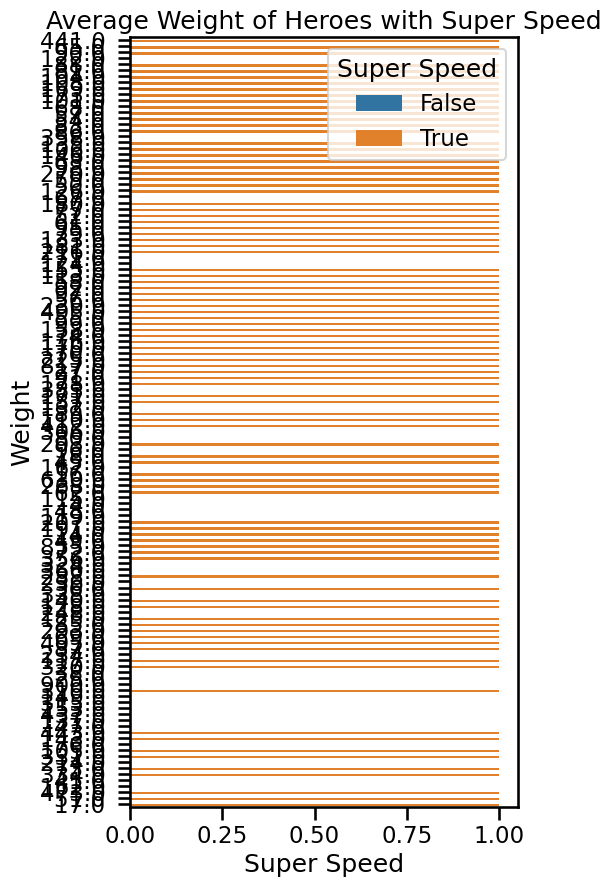

In [40]:
#What is the average weight of super powers who have super speed 
#to those who do not?
plt.figure(figsize=(5,10))
ax = sns.barplot(x = 'Super Speed', y='Weight', data=df_hero, errorbar=None)
plt.xlabel('Super Speed')
plt.ylabel('Weight')
ax.set_title('Average Weight of Heroes with Super Speed')

In [44]:
# Question 2:
plt.figure(figsize=(10,12))
ax = sns.barplot(x = 'Publisher', y = 'Height', data = df_hero, errorbar=None)
plt.xlabel('Publisher')
plt.xticks(rotation=45)
plt.ylabel('Height')
ax.set_title('Average Hero Height by Publisher')


TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1000x1200 with 0 Axes>